In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import os
import glob
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [30]:
#6103 Group Project
#Example on the HDFCBANK datasets from NYSE and NSE
files = glob.glob("DM stock dataset\ICICIBANK NYSE\*.csv")
dfICNY = []
for f in files:
    csv = pd.read_csv(f)
    dfICNY.append(csv)
dfICNY = pd.concat(dfICNY)

In [31]:
dfNAS = pd.read_csv("Dataset updated/NASDAQ.csv")
dfNAS

Date          Open          High           Low         Close  \
0     2010-01-04   2294.409912   2311.149902   2294.409912   2308.419922   
1     2010-01-05   2307.270020   2313.729980   2295.620117   2308.709961   
2     2010-01-06   2307.709961   2314.070068   2295.679932   2301.090088   
3     2010-01-07   2298.090088   2301.300049   2285.219971   2300.050049   
4     2010-01-08   2292.239990   2317.600098   2290.610107   2317.169922   
...          ...           ...           ...           ...           ...   
3238  2022-11-11  11124.750000  11352.429688  11069.830078  11323.330078   
3239  2022-11-14  11233.900391  11350.120117  11167.169922  11196.219727   
3240  2022-11-15  11474.820313  11492.620117  11241.150391  11358.410156   
3241  2022-11-16  11260.099609  11286.099609  11162.919922  11183.660156   
3242  2022-11-17  11008.669922  11198.839844  11006.209961  11144.959961   

         Adj Close      Volume  
0      2308.419922  1931380000  
1      2308.709961  2367860000  
2      2301.090088  2253340000  
3      2300.050049  2270050000  
4      2317.169922  2145390000  
...            ...         ...  
3238  11323.330078  5867750000  
3239  11196.219727  5004060000  
3240  11358.410156  5617310000  
3241  11183.660156  4585190000  
3242  11144.959961  4354360000  

[3243 rows x 7 columns]

In [32]:
dfICNY = dfICNY.reset_index(drop=True)

In [33]:
dfICNY

Date       Open       High        Low      Close  Adj Close  \
0     2010-01-04   6.910909   7.060000   6.894545   7.047273   6.150249   
1     2010-01-05   6.996364   7.147273   6.978182   7.147273   6.237521   
2     2010-01-06   7.096364   7.127273   7.020000   7.034545   6.139140   
3     2010-01-07   7.052727   7.107273   6.992727   7.018182   6.124861   
4     2010-01-08   6.938182   6.952727   6.840000   6.872727   5.997920   
...          ...        ...        ...        ...        ...        ...   
3016  2021-12-27  19.430000  19.540001  19.360001  19.490000  19.374544   
3017  2021-12-28  19.500000  19.670000  19.490000  19.540001  19.424250   
3018  2021-12-29  19.500000  19.549999  19.290001  19.430000  19.314901   
3019  2021-12-30  19.500000  19.719999  19.500000  19.650000  19.533596   
3020  2021-12-31  19.820000  19.889999  19.750000  19.790001  19.672770   

        Volume  
0      9864800  
1     14232900  
2     16669400  
3     10411500  
4     14430900  
...        ...  
3016   4633400  
3017   4276900  
3018   3192800  
3019   3080000  
3020   2905600  

[3021 rows x 7 columns]

In [34]:
files = glob.glob("DM stock dataset\ICICIBANK NSE\*.csv")
dfICN = []
for f in files:
    csv = pd.read_csv(f)
    dfICN.append(csv)
dfICN = pd.concat(dfICN)
dfICN = dfICN.reset_index(drop=True)
dfICN

Date        Open        High         Low       Close   Adj Close  \
0     2010-01-04  159.454544  160.909088  159.090912  159.945450  134.815323   
1     2010-01-05  161.454544  163.590912  160.272720  161.463638  136.094971   
2     2010-01-06  162.727264  164.972733  161.836365  162.699997  137.137054   
3     2010-01-07  163.045456  163.045456  159.363632  161.163635  135.842102   
4     2010-01-08  161.654541  161.818176  158.363632  158.899994  133.934128   
...          ...         ...         ...         ...         ...         ...   
2964  2021-12-27  724.000000  738.750000  716.099976  736.000000  731.609619   
2965  2021-12-28  740.400024  742.450012  732.500000  735.799988  731.410828   
2966  2021-12-29  738.000000  744.950012  731.900024  735.700012  731.311462   
2967  2021-12-30  733.299988  740.500000  729.000000  735.700012  731.311462   
2968  2021-12-31  736.549988  746.250000  736.549988  740.150024  735.734924   

          Volume  
0      9162186.0  
1     14659997.0  
2     20410054.0  
3     10852286.0  
4     20580934.0  
...          ...  
2964   7955163.0  
2965  17833655.0  
2966   7143073.0  
2967  14326182.0  
2968   6973055.0  

[2969 rows x 7 columns]

In [35]:
#For now, I'll drop the adjusted close.
dfICNY = dfICNY[["Date","Open","Close", "High", "Low", "Volume"]]
dfICN = dfICN[["Date","Open","Close"]]
dfNAS = dfNAS[["Date","Open","Close","High","Low"]]

In [36]:
dfICN = dfICN.rename(columns={"Open": "OpenNSE", "Close": "CloseNSE"})
dfNAS = dfNAS.rename(columns={"Open": "OpenNAS", "Close": "CloseNAS", "High": "HighNAS", "Low": "LowNAS"})

In [37]:
dfIC = dfICNY.merge(dfICN, on = "Date")
dfIC = dfIC.merge(dfNAS, on = "Date")
dfIC

Date       Open      Close       High        Low    Volume  \
0     2010-01-04   6.910909   7.047273   7.060000   6.894545   9864800   
1     2010-01-05   6.996364   7.147273   7.147273   6.978182  14232900   
2     2010-01-06   7.096364   7.034545   7.127273   7.020000  16669400   
3     2010-01-07   7.052727   7.018182   7.107273   6.992727  10411500   
4     2010-01-08   6.938182   6.872727   6.952727   6.840000  14430900   
...          ...        ...        ...        ...        ...       ...   
2869  2021-12-27  19.430000  19.490000  19.540001  19.360001   4633400   
2870  2021-12-28  19.500000  19.540001  19.670000  19.490000   4276900   
2871  2021-12-29  19.500000  19.430000  19.549999  19.290001   3192800   
2872  2021-12-30  19.500000  19.650000  19.719999  19.500000   3080000   
2873  2021-12-31  19.820000  19.790001  19.889999  19.750000   2905600   

         OpenNSE    CloseNSE       OpenNAS      CloseNAS       HighNAS  \
0     159.454544  159.945450   2294.409912   2308.419922   2311.149902   
1     161.454544  161.463638   2307.270020   2308.709961   2313.729980   
2     162.727264  162.699997   2307.709961   2301.090088   2314.070068   
3     163.045456  161.163635   2298.090088   2300.050049   2301.300049   
4     161.654541  158.899994   2292.239990   2317.169922   2317.600098   
...          ...         ...           ...           ...           ...   
2869  724.000000  736.000000  15696.830078  15871.259766  15871.400391   
2870  740.400024  735.799988  15895.200195  15781.719727  15901.469727   
2871  738.000000  735.700012  15794.919922  15766.219727  15821.809570   
2872  733.299988  735.700012  15758.980469  15741.559570  15868.089844   
2873  736.549988  740.150024  15722.910156  15644.969727  15777.429688   

            LowNAS  
0      2294.409912  
1      2295.620117  
2      2295.679932  
3      2285.219971  
4      2290.610107  
...            ...  
2869  15696.830078  
2870  15757.070313  
2871  15679.849609  
2872  15729.160156  
2873  15643.940430  

[2874 rows x 12 columns]

In [38]:
def is_positive(k):
    if(k>0):
        return 1
    else:
        return 0    

In [39]:
dfIC['NYSEDiff'] = dfIC['Close']-dfIC['Open']
dfIC['NYSEDiffHL'] = dfIC['High']-dfIC['Low']
dfIC['NSEDiff'] = dfIC['CloseNSE']-dfIC['OpenNSE']
dfIC['NASDiff'] = dfIC['CloseNAS']-dfIC['OpenNAS']
dfIC['NASDiffHL'] = dfIC['HighNAS']-dfIC['LowNAS']
dfIC['NSERes'] = dfIC['NSEDiff'].map(lambda x: is_positive(x))
dfIC['NSERes'] = pd.Categorical(dfIC.NSERes)
dfIC

Date       Open      Close       High        Low    Volume  \
0     2010-01-04   6.910909   7.047273   7.060000   6.894545   9864800   
1     2010-01-05   6.996364   7.147273   7.147273   6.978182  14232900   
2     2010-01-06   7.096364   7.034545   7.127273   7.020000  16669400   
3     2010-01-07   7.052727   7.018182   7.107273   6.992727  10411500   
4     2010-01-08   6.938182   6.872727   6.952727   6.840000  14430900   
...          ...        ...        ...        ...        ...       ...   
2869  2021-12-27  19.430000  19.490000  19.540001  19.360001   4633400   
2870  2021-12-28  19.500000  19.540001  19.670000  19.490000   4276900   
2871  2021-12-29  19.500000  19.430000  19.549999  19.290001   3192800   
2872  2021-12-30  19.500000  19.650000  19.719999  19.500000   3080000   
2873  2021-12-31  19.820000  19.790001  19.889999  19.750000   2905600   

         OpenNSE    CloseNSE       OpenNAS      CloseNAS       HighNAS  \
0     159.454544  159.945450   2294.409912   2308.419922   2311.149902   
1     161.454544  161.463638   2307.270020   2308.709961   2313.729980   
2     162.727264  162.699997   2307.709961   2301.090088   2314.070068   
3     163.045456  161.163635   2298.090088   2300.050049   2301.300049   
4     161.654541  158.899994   2292.239990   2317.169922   2317.600098   
...          ...         ...           ...           ...           ...   
2869  724.000000  736.000000  15696.830078  15871.259766  15871.400391   
2870  740.400024  735.799988  15895.200195  15781.719727  15901.469727   
2871  738.000000  735.700012  15794.919922  15766.219727  15821.809570   
2872  733.299988  735.700012  15758.980469  15741.559570  15868.089844   
2873  736.549988  740.150024  15722.910156  15644.969727  15777.429688   

            LowNAS  NYSEDiff  NYSEDiffHL    NSEDiff     NASDiff   NASDiffHL  \
0      2294.409912  0.136364    0.165455   0.490906   14.010010   16.739990   
1      2295.620117  0.150909    0.169091   0.009094    1.439941   18.109863   
2      2295.679932 -0.061819    0.107273  -0.027267   -6.619873   18.390136   
3      2285.219971 -0.034545    0.114546  -1.881821    1.959961   16.080078   
4      2290.610107 -0.065455    0.112727  -2.754547   24.929932   26.989991   
...            ...       ...         ...        ...         ...         ...   
2869  15696.830078  0.060000    0.180000  12.000000  174.429688  174.570313   
2870  15757.070313  0.040001    0.180000  -4.600036 -113.480468  144.399414   
2871  15679.849609 -0.070000    0.259998  -2.299988  -28.700195  141.959961   
2872  15729.160156  0.150000    0.219999   2.400024  -17.420899  138.929688   
2873  15643.940430 -0.029999    0.139999   3.600036  -77.940429  133.489258   

     NSERes  
0         1  
1         1  
2         0  
3         0  
4         0  
...     ...  
2869      1  
2870      0  
2871      0  
2872      1  
2873      1  

[2874 rows x 18 columns]

In [40]:
dfIC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2874 entries, 0 to 2873
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Date        2874 non-null   object  
 1   Open        2874 non-null   float64 
 2   Close       2874 non-null   float64 
 3   High        2874 non-null   float64 
 4   Low         2874 non-null   float64 
 5   Volume      2874 non-null   int64   
 6   OpenNSE     2874 non-null   float64 
 7   CloseNSE    2874 non-null   float64 
 8   OpenNAS     2874 non-null   float64 
 9   CloseNAS    2874 non-null   float64 
 10  HighNAS     2874 non-null   float64 
 11  LowNAS      2874 non-null   float64 
 12  NYSEDiff    2874 non-null   float64 
 13  NYSEDiffHL  2874 non-null   float64 
 14  NSEDiff     2874 non-null   float64 
 15  NASDiff     2874 non-null   float64 
 16  NASDiffHL   2874 non-null   float64 
 17  NSERes      2874 non-null   category
dtypes: category(1), float64(15), int64(1), object(1)

In [41]:
dfICM = dfIC.loc[:, ~dfIC.columns.isin(['OpenNSE', 'CloseNSE'])]
dfICM

Date       Open      Close       High        Low    Volume  \
0     2010-01-04   6.910909   7.047273   7.060000   6.894545   9864800   
1     2010-01-05   6.996364   7.147273   7.147273   6.978182  14232900   
2     2010-01-06   7.096364   7.034545   7.127273   7.020000  16669400   
3     2010-01-07   7.052727   7.018182   7.107273   6.992727  10411500   
4     2010-01-08   6.938182   6.872727   6.952727   6.840000  14430900   
...          ...        ...        ...        ...        ...       ...   
2869  2021-12-27  19.430000  19.490000  19.540001  19.360001   4633400   
2870  2021-12-28  19.500000  19.540001  19.670000  19.490000   4276900   
2871  2021-12-29  19.500000  19.430000  19.549999  19.290001   3192800   
2872  2021-12-30  19.500000  19.650000  19.719999  19.500000   3080000   
2873  2021-12-31  19.820000  19.790001  19.889999  19.750000   2905600   

           OpenNAS      CloseNAS       HighNAS        LowNAS  NYSEDiff  \
0      2294.409912   2308.419922   2311.149902   2294.409912  0.136364   
1      2307.270020   2308.709961   2313.729980   2295.620117  0.150909   
2      2307.709961   2301.090088   2314.070068   2295.679932 -0.061819   
3      2298.090088   2300.050049   2301.300049   2285.219971 -0.034545   
4      2292.239990   2317.169922   2317.600098   2290.610107 -0.065455   
...            ...           ...           ...           ...       ...   
2869  15696.830078  15871.259766  15871.400391  15696.830078  0.060000   
2870  15895.200195  15781.719727  15901.469727  15757.070313  0.040001   
2871  15794.919922  15766.219727  15821.809570  15679.849609 -0.070000   
2872  15758.980469  15741.559570  15868.089844  15729.160156  0.150000   
2873  15722.910156  15644.969727  15777.429688  15643.940430 -0.029999   

      NYSEDiffHL    NSEDiff     NASDiff   NASDiffHL NSERes  
0       0.165455   0.490906   14.010010   16.739990      1  
1       0.169091   0.009094    1.439941   18.109863      1  
2       0.107273  -0.027267   -6.619873   18.390136      0  
3       0.114546  -1.881821    1.959961   16.080078      0  
4       0.112727  -2.754547   24.929932   26.989991      0  
...          ...        ...         ...         ...    ...  
2869    0.180000  12.000000  174.429688  174.570313      1  
2870    0.180000  -4.600036 -113.480468  144.399414      0  
2871    0.259998  -2.299988  -28.700195  141.959961      0  
2872    0.219999   2.400024  -17.420899  138.929688      1  
2873    0.139999   3.600036  -77.940429  133.489258      1  

[2874 rows x 16 columns]

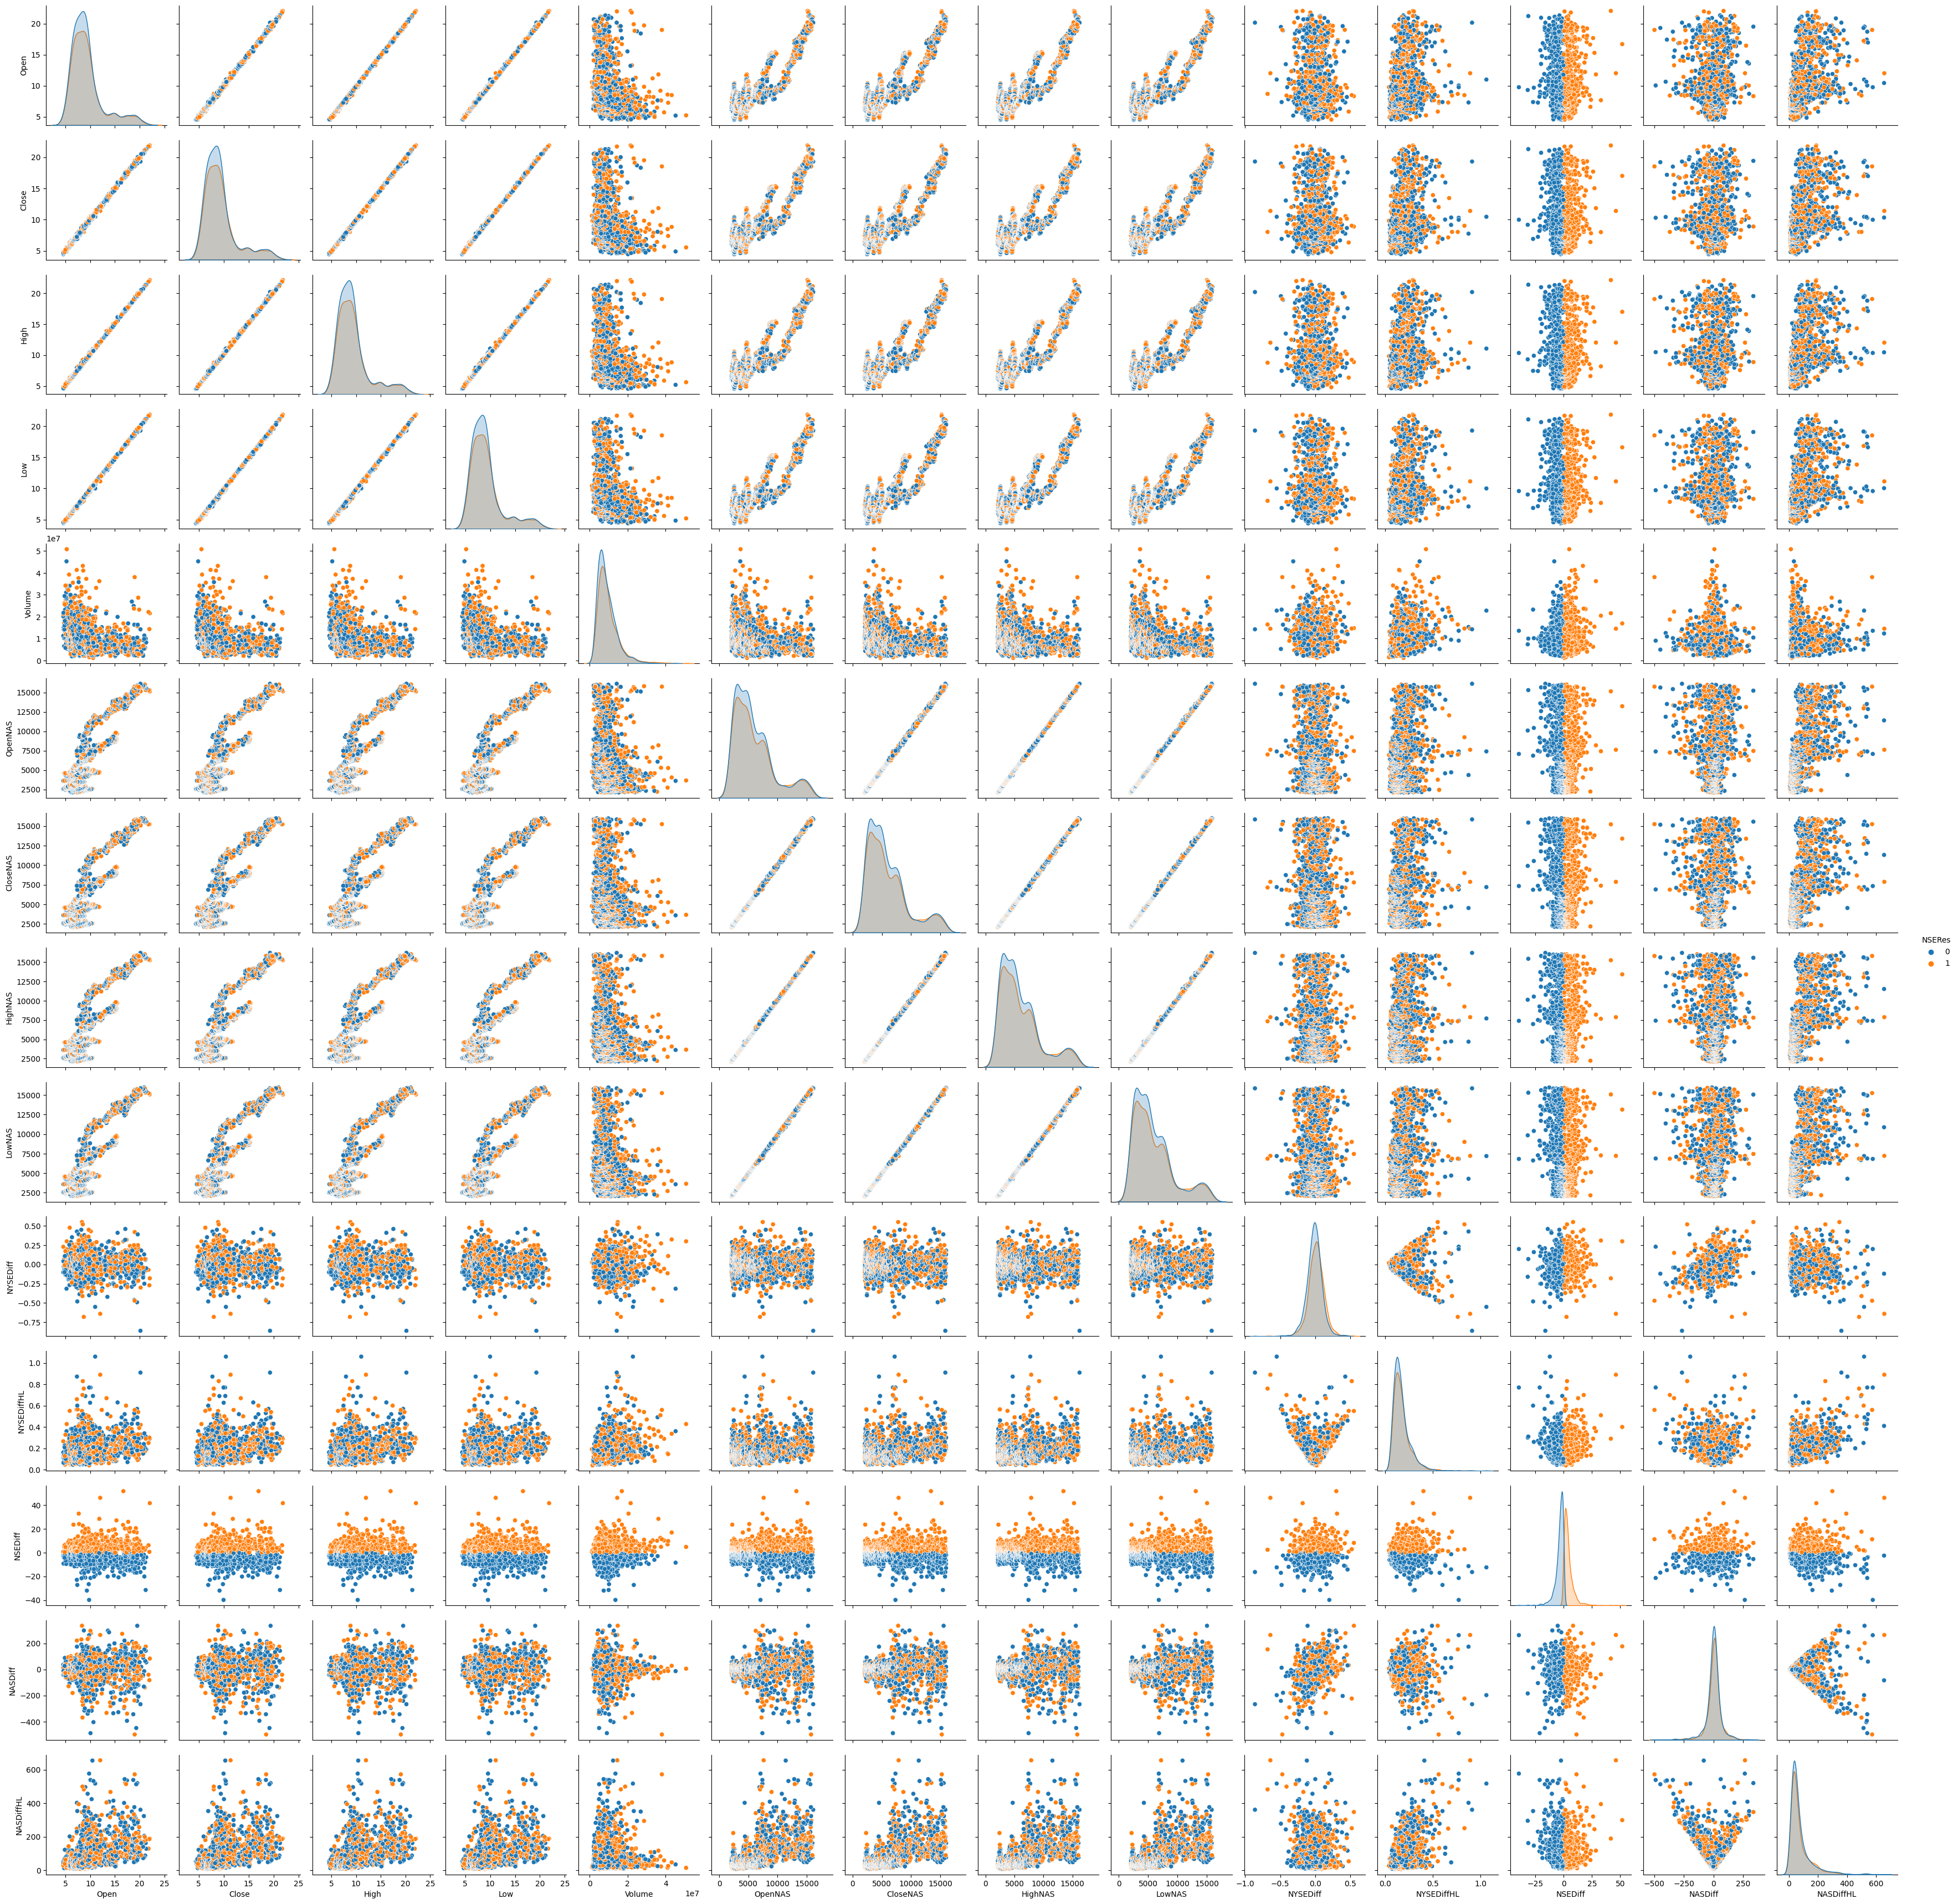

In [42]:
sns.pairplot(dfICM, hue='NSERes')
#Pair plots don't give much information, everything seems to be jumbled together. 
#The NYSERatio covariate seems to be normally distributed.

In [ ]:
dfIC["NYSE_Percent_Change"] = ((dfIC["Close"]-dfIC["Open"])/dfIC["Open"])
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.histplot(x='NYSE_Percent_Change', hue='NSERes', data=dfIC, ax=ax)
plt.show()

In [53]:
y = dfICM["NSERes"]
x = dfICM.drop(["NSERes", "Date"], axis=1)

In [54]:
#2 Logistic Regression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1000)

In [55]:
model = LogisticRegression(penalty='none', max_iter=1000)
model_fit = model.fit(x_train, y_train)

In [56]:
# Accuracy is sitting a bit under .56%
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)

0.52954808806489


In [57]:
print(confusion_matrix(y_test, y_predict))

[[448   7]
 [399   9]]


In [58]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69       455
           1       0.56      0.02      0.04       408

    accuracy                           0.53       863
   macro avg       0.55      0.50      0.37       863
weighted avg       0.54      0.53      0.38       863



In [ ]:
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=1000)
)
y_score = classifier.fit(x_train, y_train).decision_function(x_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y.shape[0]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
#Not a great prediction with an AUC of .57, but at least higher than the null of 0.5

In [ ]:
#3 Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
model.fit(x_train, y_train)
test = model.predict(x_test)

# check accuracy
score = accuracy_score(y_test, test)
print(f"accuracy：{score * 100}%")

In [ ]:
fti = model.feature_importances_ 
for i, feat in enumerate(x.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = [None, 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 2, stop = 5, num = 4)]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth,
               'bootstrap': bootstrap}
rf_random = GridSearchCV(estimator=model, param_distributions = random_grid,
                               n_iter = 100, cv = 5, random_state = 0)
rf_random.fit(x_train, y_train)

In [ ]:
rf2 = RandomForestClassifier(n_estimators=600, max_features=None, max_depth=2, bootstrap=False)
rf2.fit(x_train, y_train)
test = rf2.predict(x_test)
score = accuracy_score(y_test, test)
print(f"accuracy：{score * 100}%")

In [ ]:
fti = rf2.feature_importances_ 
for i, feat in enumerate(x.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

In [ ]:
rf2 = RandomForestClassifier(n_estimators=200, max_features=None, max_depth=3, bootstrap=True, random_state=1000)
rf2.fit(x_train, y_train)
test = rf2.predict(x_test)
score = accuracy_score(y_test, test)
print(f"accuracy：{score * 100}%")

In [ ]:
cm_test = confusion_matrix(y_test, test)
print(cm_test)
print(classification_report(y_test, test))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

x = DF.iloc[:,1:10]
y = DF.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1000)
gb = GradientBoostingClassifier(random_state=1000)
gb.fit(x_train, y_train)

print("training accuracy: {:.3f}".format(gb.score(x_train, y_train)))
print("testing accuracy: {:.3f}".format(gb.score(x_test, y_test)))

In [ ]:
fti = gb.feature_importances_ 
for i, feat in enumerate(x.columns):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = [None, 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 2, stop = 5, num = 4)]
learning_rate = [0.1, 0.01, 0.001, 0.0001]
grid = {'n_estimators': n_estimators, 
        'max_features': max_features, 
        'max_depth': max_depth,
        'learning_rate': learning_rate}
gb_grid = GridSearchCV(estimator=gb, param_grid = grid, cv = 5)
gb_grid.fit(x_train, y_train)

In [ ]:
gb2 = GradientBoostingClassifier(max_depth=2, n_estimators=100, max_features='sqrt', learning_rate=0.1)
gb2.fit(x_train, y_train)
test = gb2.predict(x_test)
print("training accuracy: {:.3f}".format(gb2.score(x_train, y_train)))
print("testing accuracy: {:.3f}".format(gb2.score(x_test, y_test)))

In [ ]:
cm_test = confusion_matrix(y_test, test)
print(cm_test)
print(classification_report(y_test, test))